# Pandas Crash Course

> Pandas provides data structures and functionality to quickly manipulate and analyse data. The key concepts of Pandas are - Series and DataFrame data structures

## 1.1 Series
- A series is a one dimensional array of data where the rows can be labeled

In [1]:
import numpy as np
import pandas as pd

In [8]:
# Create a Series from ndarray
a = np.array([1, 2, 3])
row_names = ['a', 'b', 'c']
series = pd.Series(a, index=row_names)
print(series)

a    1
b    2
c    3
dtype: int64


In [9]:
# Can access data in a series like a NumPy array
print(series[0])

# Can access data in a series like a dictionary
print(series['a'])


1
1


In [19]:
# retrive multiple elements
print(series[-2:]) # last two elements
print('------')
print(series[['a', 'b']]) # first two elements

b    2
c    3
dtype: int64
------
a    1
b    2
dtype: int64


In [12]:
# Create a series using dict
data = {'a' : 1, 'b' : 2, 'c' : 3}
s = pd.Series(data)
print (s)

a    1
b    2
c    3
dtype: int64


In [15]:
# Create a Series from Scalar
s = pd.Series(5, index=[0, 1, 2, 3])
print(s)

0    5
1    5
2    5
3    5
dtype: int64


## 1.2 DataFrame
- A data frame is a multi-dimentional array where the rows and the columns can be labeled.

In [5]:
b = np.array([[1, 2, 3], [4, 5, 6]])
row_names = ['a', 'b']
col_names = ['one', 'two', 'three']
df = pd.DataFrame(b, index=row_names, columns=col_names)
df

,one,two,three
a,1,2,3
b,4,5,6


In [20]:
# Another example
data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'])
df

,Name,Age
0,Alex,10
1,Bob,12
2,Clarke,13


In [23]:
data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]
df = pd.DataFrame(data, index=['first', 'second'])
print(df) #inserts NaN in missing numbers

        a   b     c
first   1   2   NaN
second  5  10  20.0


In [24]:
#Create df from Series
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
      'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


### 1.2.1 Column wise manipulation

In [25]:
# Column Selection
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [27]:
# Column addition
df['three'] = df['one'] + df['two'] # Create a new column with addition of two other columns
df

,one,two,three
a,1.0,1,2.0
b,2.0,2,4.0
c,3.0,3,6.0
d,NaN,4,NaN


In [28]:
# Column deletion
df.pop('two') # can use del df['two'] as well
df

,one,three
a,1.0,2.0
b,2.0,4.0
c,3.0,6.0
d,NaN,NaN


### 1.2.2 Row-wise manipulation

In [29]:
# Row selection using row label
print(df.loc['b'])

one      2.0
three    4.0
Name: b, dtype: float64


In [33]:
# row selection using index
df.iloc[1]

one      2.0
three    4.0
Name: b, dtype: float64

In [32]:
#multiple rows
df.iloc[1:3]

,one,three
b,2.0,4.0
c,3.0,6.0


In [34]:
# add new rows
df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])

df = df.append(df2)
df

,a,b
0,1,2
1,3,4
0,5,6
1,7,8


In [35]:
# deletion of rows
df = df.drop(0)
df

,a,b
1,3,4
1,7,8


## 1.3 Basic operations

In [37]:
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Smith','Jack']),
   'Age':pd.Series([25,26,25,23,30,29,23]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}

#Create a DataFrame
df = pd.DataFrame(d)
df

,Age,Name,Rating
0,25,Tom,4.23
1,26,James,3.24
2,25,Ricky,3.98
3,23,Vin,2.56
4,30,Steve,3.20
5,29,Smith,4.60
6,23,Jack,3.80


In [38]:
# transpose operation
df.T

,0,1,2,3,4,5,6
Age,25,26,25,23,30,29,23
Name,Tom,James,Ricky,Vin,Steve,Smith,Jack
Rating,4.23,3.24,3.98,2.56,3.2,4.6,3.8


In [39]:
# axes: returns the row axis labels and column axis labels
df.axes

[RangeIndex(start=0, stop=7, step=1),
 Index(['Age', 'Name', 'Rating'], dtype='object')]

In [40]:
# Data types for each column
df.dtypes

Age         int64
Name       object
Rating    float64
dtype: object

In [41]:
#shape: tuple returns number of rows and number of columns
df.shape

(7, 3)

In [42]:
# returns the actual data in the dataframe as an NDarray
df.values

array([[25, 'Tom', 4.23],
       [26, 'James', 3.24],
       [25, 'Ricky', 3.98],
       [23, 'Vin', 2.56],
       [30, 'Steve', 3.2],
       [29, 'Smith', 4.6],
       [23, 'Jack', 3.8]], dtype=object)

In [43]:
# to get a peak of the data use head() and tail() methods
df.head(2)

,Age,Name,Rating
0,25,Tom,4.23
1,26,James,3.24


In [44]:
df.tail(2)

,Age,Name,Rating
5,29,Smith,4.6
6,23,Jack,3.8


## 1.4 Basic statistics

In [45]:
df.sum() # Each individual column is added individually (strings are appended)

Age                                  181
Name      TomJamesRickyVinSteveSmithJack
Rating                             25.61
dtype: object

In [46]:
df.mean() #returns mean of the numbers

Age       25.857143
Rating     3.658571
dtype: float64

In [47]:
df.mean(1) #mean of each rows

0    14.615
1    14.620
2    14.490
3    12.780
4    16.600
5    16.800
6    13.400
dtype: float64

In [48]:
# describe() functions computes summary of statistics to the Dataframe columns

df.describe()

,Age,Rating
count,7.000000,7.000000
mean,25.857143,3.658571
std,2.734262,0.698628
min,23.000000,2.560000
25%,24.000000,3.220000
50%,25.000000,3.800000
75%,27.500000,4.105000
max,30.000000,4.600000


### 1.5 Load CSV/txt files

In [54]:
# Load the Pima Indians Diabetes classification dataset
url = 'https://goo.gl/bDdBiA' 
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)
print(data.shape)

(768, 9)


### 1.5.1 Peak at the data

In [55]:
data.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
#descriptive Statistics
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [59]:
# Get class distribution 
class_counts = data.groupby('class').size()
print(class_counts)

class
0    500
1    268
dtype: int64


### 1.5.2 understand with Visualization

In [60]:
# histograms
import matplotlib.pyplot as plt
%matplotlib inline

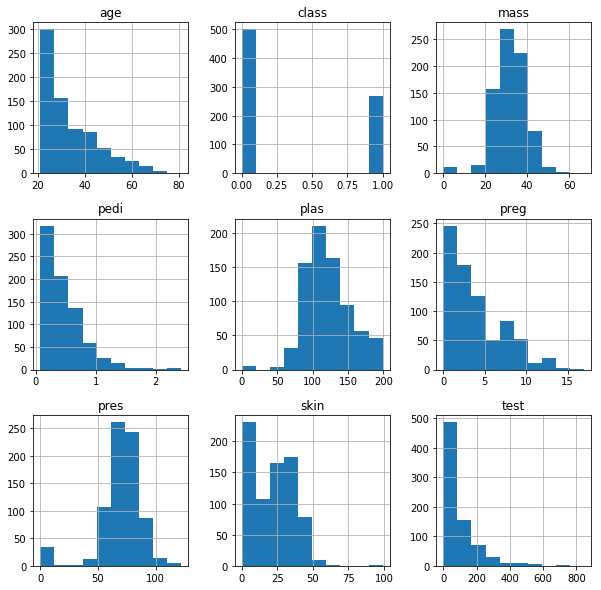

In [64]:
data.hist(figsize=(10,10))
plt.show()

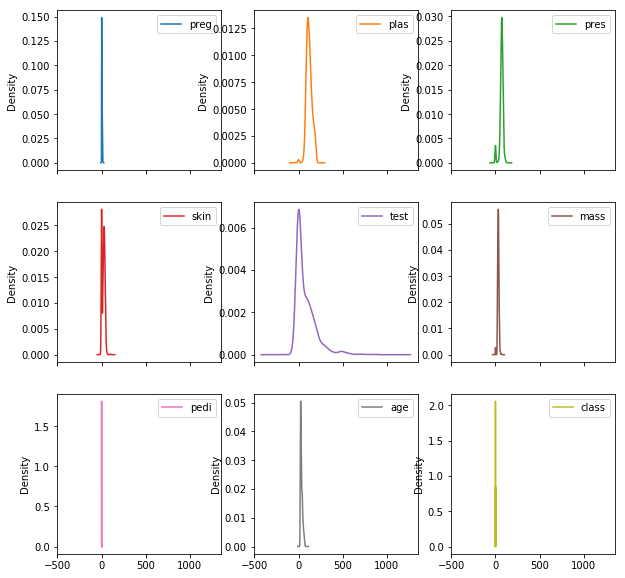

In [63]:
# Get density plots to get an idea of the distribution of each attribute

data.plot(kind='density', subplots=True, figsize=(10,10), layout=(3,3))
plt.show()

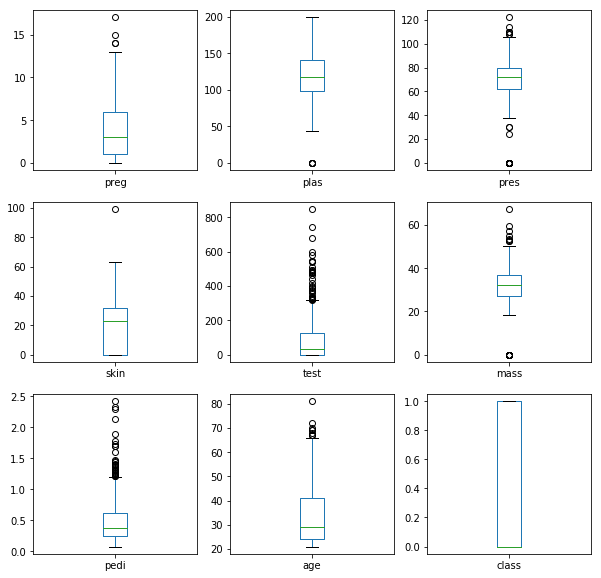

In [65]:
# Box and whisker plots to review distribution of each attribute

data.plot(kind='box',subplots=True, figsize=(10,10), layout=(3,3))
plt.show()

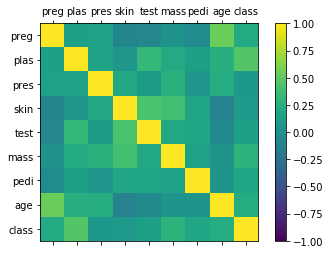

In [71]:
# Correlation matrix plot - Gives cross correlation between the variables.
correlations = data.corr()

#plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

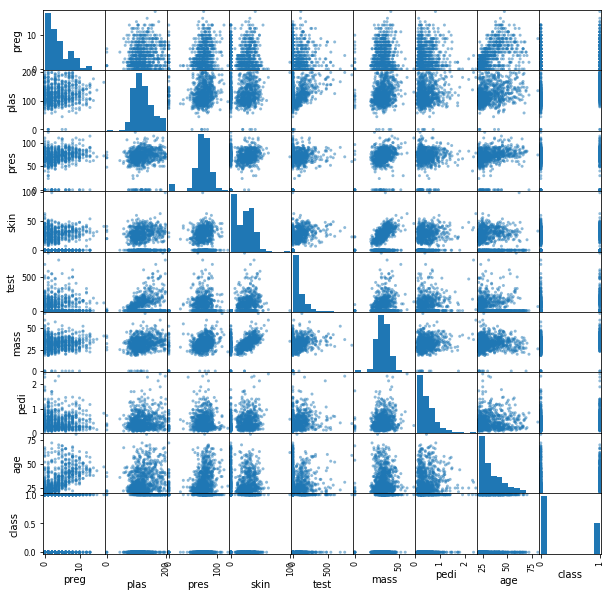

In [73]:
# scatter plots

from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(10,10))
plt.show()